# **Capstone: Digital Marketing Effectiveness Across Different Customer Segmentations**

## **Introduction:** 
As of February 2025, 67.9% of the global population (5.56 billion people) worldwide use the internet. Of this, 63.9% (5.24b) use social media. <br>
This results in businesses utilising a wide variety of digital marketing techniques, which includes but are not limited to:
* Social media marketing
* Search engine optimization (SEO)
* Email marketing
* Pay-per-click (PPC) advertising
* Content marketing
  
Understanding the effectiveness of each technique on different segments of a customer base is integral in creating sales.

## **Aims:**
1. Effectiveness of type of marketing campaign on customer segmentation
> marketing campaigns vs age group <br>
> marketing campaigns vs gender

2. Analysing most cost-effective channels of marketing per campaign
> duration of campaign and type vs engagement

-----------------------------------------------------------------------------------------------------------------------------

## **Dataset disclosure**
This analysis is built upon the dataset ['Social Media Advertisement Performance'](https://www.kaggle.com/datasets/alperenmyung/social-media-advertisement-performance) from Kaggle created by Alperen Atik. This dataset is **synthetic**; generated entirely using Python libraries (Faker and NumPy). It simulates real-world scenario where a business runs mulitple ads under a variety of campaigns, tracking a user's journey from first exposure to potential final conversion. <br>

**File details**
* users.csv: includes detailed demographic data. Key for segmentation 
* campaigns.csv: data on marketing campaigns (budget, start/end date, duration)
* ads.csv: specific campaign assets to measure effectiveness (targets, campaign type)
* ad_events.csv: transactional log for each user interaction with campaign <br>

-----------------------------------------------------------------------------------------------------------------------------

# **Data Preparation**

In [1]:
#Importing libraries and loading dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ad_events = pd.read_csv('ad_events.csv')
ads = pd.read_csv('ads.csv')
campaigns = pd.read_csv('campaigns.csv')
users = pd.read_csv('users.csv')

## **Scoping**
Displaying the columns in each dataset to understand data type and key variables

In [68]:
ad_events.info()
ad_events['event_type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   event_id     400000 non-null  int64 
 1   ad_id        400000 non-null  int64 
 2   user_id      400000 non-null  object
 3   timestamp    400000 non-null  object
 4   day_of_week  400000 non-null  object
 5   time_of_day  400000 non-null  object
 6   event_type   400000 non-null  object
dtypes: int64(2), object(5)
memory usage: 21.4+ MB


array(['Like', 'Share', 'Impression', 'Purchase', 'Click', 'Comment'],
      dtype=object)

> **event_types** column list each possible individual interactions with marketing campaign <br>

In [47]:
ads.info()
ads['ad_platform'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ad_id             200 non-null    int64 
 1   campaign_id       200 non-null    int64 
 2   ad_platform       200 non-null    object
 3   ad_type           200 non-null    object
 4   target_gender     200 non-null    object
 5   target_age_group  200 non-null    object
 6   target_interests  200 non-null    object
dtypes: int64(2), object(5)
memory usage: 11.1+ KB


array(['Facebook', 'Instagram'], dtype=object)

In [95]:
ads['ad_type'].unique()

array(['Video', 'Stories', 'Carousel', 'Image'], dtype=object)

> **ad_platform** and **ad_type** provides information on marketing channels and techniques utilised

In [84]:
campaigns.info()
campaigns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   campaign_id    50 non-null     int64  
 1   name           50 non-null     object 
 2   start_date     50 non-null     object 
 3   end_date       50 non-null     object 
 4   duration_days  50 non-null     int64  
 5   total_budget   50 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


,campaign_id,name,start_date,end_date,duration_days,total_budget
0,1,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32
1,2,Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41
2,3,Campaign_3_Winter,2025-05-04,2025-06-29,56,14343.25
3,4,Campaign_4_Summer,2025-06-04,2025-08-08,65,45326.60
4,5,Campaign_5_Launch,2025-07-11,2025-08-28,48,68376.69


In [54]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      10000 non-null  object
 1   user_gender  10000 non-null  object
 2   user_age     10000 non-null  int64 
 3   age_group    10000 non-null  object
 4   country      10000 non-null  object
 5   location     10000 non-null  object
 6   interests    10000 non-null  object
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


,user_id,user_gender,user_age,age_group,country,location,interests
0,a2474,Female,24,18-24,United Kingdom,New Mariomouth,"fitness, health"
1,141e5,Male,21,18-24,Germany,Danielsfort,"food, fitness, lifestyle"
2,34db0,Male,27,25-34,Australia,Vincentchester,"fashion, news"
3,20d08,Female,28,25-34,India,Lisaport,"health, news, finance"
4,9e830,Male,28,25-34,United States,Brownmouth,"health, photography, lifestyle"


# **Data Transformation**
Transformation is aimed to standardise data for more comprehensive analysis

### **1. Campaign length**

In [136]:
#Standardising campaign lengths through data transformation

#Check all unique campaign durations
campaigns['duration_days'].unique()

array([59, 82, 56, 65, 48, 84, 72, 41, 49, 69, 85, 73, 50, 89, 87, 57, 70,
       90, 64, 36, 54, 77, 52, 74, 43, 60, 81, 67, 75, 47, 71, 78, 32])

The raw data on duration for each campaign is unstandardised <br> 
Categorising them would be the best approach in understanding the effectiveness of each length type

In [2]:
#Defining new standardised categories for new column 'campaign_length'
def campaign_categories(days):
    if days <= 42:
        return 'Short'
    elif days >= 43 and days <= 70:
        return 'Medium'
    else:
        return 'Long'

#Apply categorisation to create column
campaigns['campaign_length'] = campaigns['duration_days'].apply(campaign_categories)

#Displaying rows for verification
campaigns[['duration_days','campaign_length']].head()

,duration_days,campaign_length
0,59,Medium
1,82,Long
2,56,Medium
3,65,Medium
4,48,Medium


### **2. Total budget**

In [134]:
#Standardising total budget

#Budget total check
campaigns['total_budget'].unique()

array([24021.32, 79342.41, 14343.25, 45326.6 , 68376.69, 78607.49,
       43744.59, 39953.19, 40094.07, 19669.27, 79067.91, 30525.65,
       21855.42, 39849.94, 85407.23, 71521.88, 86675.92, 48832.61,
       33182.45, 98904.66, 37290.81, 35743.4 , 26001.67, 56692.87,
       52725.49, 44538.87, 12986.3 , 32844.79, 19773.66, 73911.29,
       72208.34, 81744.53, 59264.68, 26104.3 , 71626.83, 58801.99,
       46445.2 , 71038.28, 55638.18, 53936.41, 85220.35,  7918.04,
       81350.3 , 15914.87, 53303.55, 94023.76, 69493.36, 13842.07,
       28962.34, 47274.7 ])

Similar to campaign duration, total budget spent / allocated is unstandardised <br> 
Categorising the budget would also provide a more hollistic view of the campaigns.

In [3]:
#Defining new categories for new column 'budget_category'
def budget_spent(amount):
    if amount <= 15000:
        return 'Under 15k'
    elif amount >= 15000 and amount <= 45000:
        return 'Between 15k to 45k'
    elif amount >= 45000 and amount <= 75000:
        return 'Between 45k to 75k'
    else:
        return 'Over 75k'

#Apply to create category
campaigns['budget_category'] = campaigns['total_budget'].apply(budget_spent)

#Display for verification
campaigns[['budget_category','total_budget']].sample(10)

,budget_category,total_budget
3,Between 45k to 75k,45326.60
35,Between 45k to 75k,58801.99
8,Between 15k to 45k,40094.07
15,Between 45k to 75k,71521.88
46,Between 45k to 75k,69493.36
29,Between 45k to 75k,73911.29
45,Over 75k,94023.76
14,Over 75k,85407.23
0,Between 15k to 45k,24021.32
44,Between 45k to 75k,53303.55


# **Data Merging**

## **Merge A:** Transformed Data
**Step 1:** Join 'campaign_length' and 'budget_category' columns into ads dataframe

In [4]:
ads = pd.merge(ads, campaigns[['campaign_id', 'campaign_length']],on='campaign_id', how='inner')

In [5]:
ads = pd.merge(ads, campaigns[['campaign_id', 'budget_category']],on='campaign_id', how='inner')

In [6]:
#display dataframe after merge
ads.head()

,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests,campaign_length,budget_category
0,1,28,Facebook,Video,Female,35-44,"art, technology",Medium,Between 15k to 45k
1,2,33,Facebook,Stories,All,25-34,"travel, photography",Long,Between 45k to 75k
2,3,20,Instagram,Carousel,All,25-34,technology,Long,Over 75k
3,4,28,Facebook,Stories,Female,25-34,news,Medium,Between 15k to 45k
4,5,24,Instagram,Image,Female,25-34,news,Medium,Between 45k to 75k


**Step 2.** Merge merged / updated ads dataframe into ad_events dataframe

In [7]:
ad_events = pd.merge(ad_events, ads[['ad_id', 'campaign_length']],on='ad_id',how='inner')

In [8]:
ad_events = pd.merge(ad_events, ads[['ad_id', 'budget_category']],on='ad_id',how='inner')

In [9]:
#display dataframe after merge
ad_events.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_length,budget_category
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,Medium,Between 15k to 45k
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,Long,Between 15k to 45k
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,Medium,Between 15k to 45k
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,Medium,Between 15k to 45k
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,Long,Over 75k


## **Merge B:** Other key columns
**Step 1.** remove irrelevant columns from ads_events to declutter

In [10]:
ad_events.drop(['time_of_day'],axis='columns',inplace=True)

In [11]:
ad_events.drop(['timestamp','day_of_week'],axis='columns',inplace=True)

**Step 2.** Merge columns from ads dataframe for analysis <br> 
Columns merging:
* ad_type
* ad_platform
* target_age_group
* target_gender

In [12]:
#merge ad_platform column to ad_events
ad_events = pd.merge(ad_events, ads[['ad_id', 'ad_platform']],on='ad_id',how='inner')

In [13]:
#merge ad_type to ad_events
ad_events = pd.merge(ad_events, ads[['ad_id', 'ad_type']],on='ad_id',how='inner')

In [14]:
ad_events = pd.merge(ad_events, ads[['ad_id', 'target_age_group']],on='ad_id',how='inner')

In [15]:
ad_events = pd.merge(ad_events, ads[['ad_id', 'target_gender']],on='ad_id',how='inner')

In [16]:
#display after merge for verification
ad_events.head().reset_index()

,index,event_id,ad_id,user_id,event_type,campaign_length,budget_category,ad_platform,ad_type,target_age_group,target_gender
0,0,1,197,2359b,Like,Medium,Between 15k to 45k,Facebook,Stories,All,All
1,1,2,51,f9c67,Share,Long,Between 15k to 45k,Instagram,Carousel,18-24,All
2,2,3,46,5b868,Impression,Medium,Between 15k to 45k,Instagram,Carousel,35-44,All
3,3,4,166,3d440,Impression,Medium,Between 15k to 45k,Instagram,Image,All,All
4,4,5,52,68f1a,Impression,Long,Over 75k,Instagram,Stories,35-44,Female


**Step 3.** Merge columns from users into ad_events for sample analysis <br>
Columns merged:
* age_group
* gender

In [17]:
ad_events = pd.merge(ad_events, users[['user_id', 'age_group']],on='user_id',how='inner')

In [18]:
ad_events = pd.merge(ad_events, users[['user_id', 'user_gender']],on='user_id',how='inner')

In [19]:
#display after merge for verification
ad_events.head()

,event_id,ad_id,user_id,event_type,campaign_length,budget_category,ad_platform,ad_type,target_age_group,target_gender,age_group,user_gender
0,1,197,2359b,Like,Medium,Between 15k to 45k,Facebook,Stories,All,All,18-24,Female
1,2,51,f9c67,Share,Long,Between 15k to 45k,Instagram,Carousel,18-24,All,25-34,Female
2,3,46,5b868,Impression,Medium,Between 15k to 45k,Instagram,Carousel,35-44,All,18-24,Male
3,4,166,3d440,Impression,Medium,Between 15k to 45k,Instagram,Image,All,All,18-24,Female
4,5,52,68f1a,Impression,Long,Over 75k,Instagram,Stories,35-44,Female,55-65,Male


**Misc.** Merging total_budget and duration_days in case required for analysis

In [20]:
ads = pd.merge(ads, campaigns[['campaign_id','total_budget']],on='campaign_id',how='inner')

In [21]:
ads = pd.merge(ads, campaigns[['campaign_id','duration_days']],on='campaign_id',how='inner')

In [22]:
#display dataframe after merge
ads.head()

,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests,campaign_length,budget_category,total_budget,duration_days
0,1,28,Facebook,Video,Female,35-44,"art, technology",Medium,Between 15k to 45k,32844.79,52
1,2,33,Facebook,Stories,All,25-34,"travel, photography",Long,Between 45k to 75k,59264.68,87
2,3,20,Instagram,Carousel,All,25-34,technology,Long,Over 75k,98904.66,90
3,4,28,Facebook,Stories,Female,25-34,news,Medium,Between 15k to 45k,32844.79,52
4,5,24,Instagram,Image,Female,25-34,news,Medium,Between 45k to 75k,56692.87,54


In [23]:
ad_events = pd.merge(ad_events, ads[['ad_id', 'duration_days']],on='ad_id',how='inner')

In [24]:
ad_events = pd.merge(ad_events, ads[['ad_id', 'total_budget']],on='ad_id',how='inner')

In [25]:
#display dataframe after merge
ad_events.head()

,event_id,ad_id,user_id,event_type,campaign_length,budget_category,ad_platform,ad_type,target_age_group,target_gender,age_group,user_gender,duration_days,total_budget
0,1,197,2359b,Like,Medium,Between 15k to 45k,Facebook,Stories,All,All,18-24,Female,49,40094.07
1,2,51,f9c67,Share,Long,Between 15k to 45k,Instagram,Carousel,18-24,All,25-34,Female,77,44538.87
2,3,46,5b868,Impression,Medium,Between 15k to 45k,Instagram,Carousel,35-44,All,18-24,Male,65,19669.27
3,4,166,3d440,Impression,Medium,Between 15k to 45k,Instagram,Image,All,All,18-24,Female,50,39849.94
4,5,52,68f1a,Impression,Long,Over 75k,Instagram,Stories,35-44,Female,55-65,Male,82,79342.41


# **Data Visualisation**

## **Population Visualisation**
User data was visualised with bar graphs to be able to clearly understand population distribution <br>
Key visualisations:
* gender distribution
* age group distribution

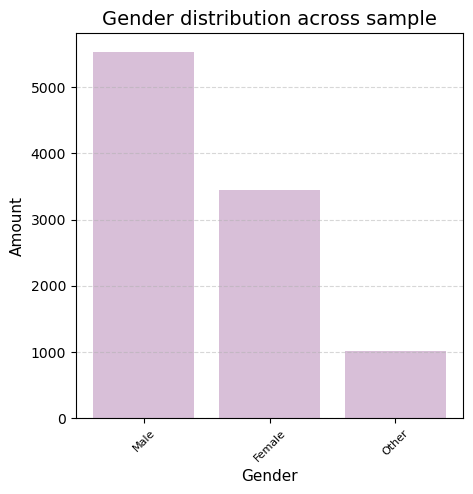

In [26]:
#Generating bar chart for gender distribution

#Counting frequency of occurences
amt_gender = users['user_gender'].value_counts()

#Plotting bar chart
plt.figure(figsize=(5,5))
plt.bar(amt_gender.index, amt_gender.values, color='thistle')
plt.title('Gender distribution across sample',fontsize=14)
plt.xlabel('Gender',fontsize=11)
plt.ylabel('Amount',fontsize=11)
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Fig 1.** Gender distribution of sample
<br> Overall, there are significantly more cis men to cis women and those who identified as 'other'

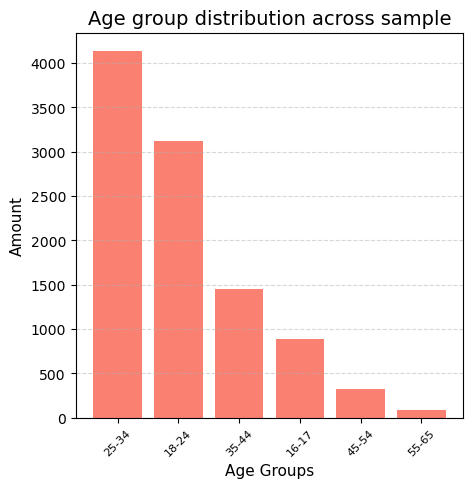

In [27]:
#Generating bar chart for demographics

#Counting occurences of users in age group
amt_age_group = users['age_group'].value_counts()

#Plotting bar chart
plt.figure(figsize=(5,5))
plt.bar(amt_age_group.index, amt_age_group.values, color='salmon')
plt.title('Age group distribution across sample',fontsize=14)
plt.xlabel('Age Groups',fontsize=11)
plt.ylabel('Amount',fontsize=11)
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Fig 2.** Age group distribution <br>
Overall, most users were between ages of 25 - 34, and less than 500 were between the ages of 55 - 65

## **Campaign details Distributions**
Details of the campaign were visualised to understand patterns and aims in campaigns <br>
Points of interest:
* Budget category
* Campaign length
* Target gender
* Target age group

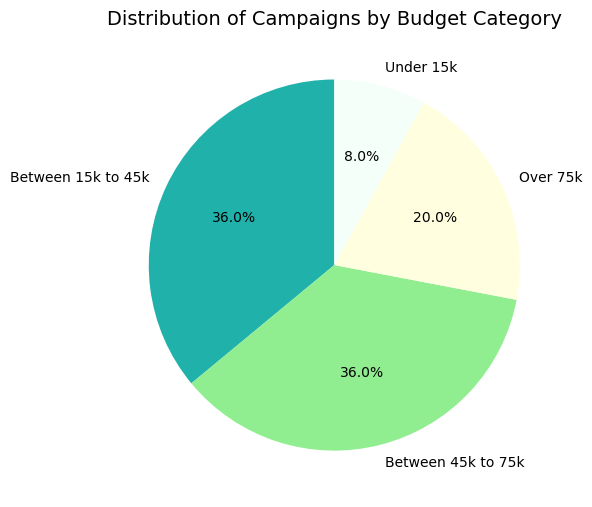

In [28]:
#color list
clr = ['#20B2AA','#90EE90','#FFFFE0','#F5FFFA']

#Getting frequency of budget category per campaign
budget_counts = campaigns['budget_category'].value_counts()

#Create the pie chart
plt.figure(figsize=(6, 6))
budget_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=clr,
    startangle=90
)

#Adding details
plt.title('Distribution of Campaigns by Budget Category', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

**Fig 3.** Ad campaigns budget <br>
Total budget allocated for campaigns ranged mostly between 15 to 75k

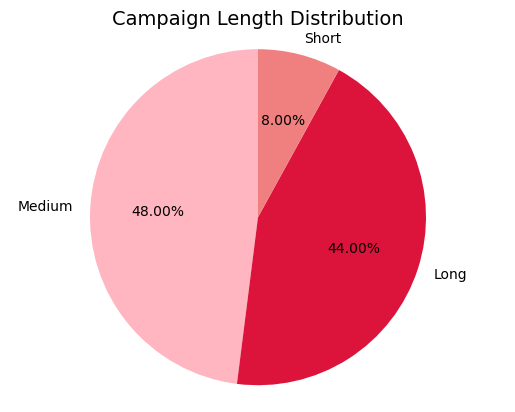

In [31]:
#color list
clr = ['#FFB6C1','#DC143C','#F08080']

amt_length = campaigns['campaign_length'].value_counts()

# Create the pie chart
plt.pie(
    x=amt_length,
    labels=amt_length.index,
    autopct='%1.2f%%',
    colors=clr,
    startangle=90
)

# Add a title
plt.title('Campaign Length Distribution', fontsize=14)

# Ensure the circle is drawn properly
plt.axis('equal')

plt.show()

**Fig 4.** Ad campaign lengths <br>
Majority of the campaigns were long, between 43 days to 90 days (2 - 3 months)

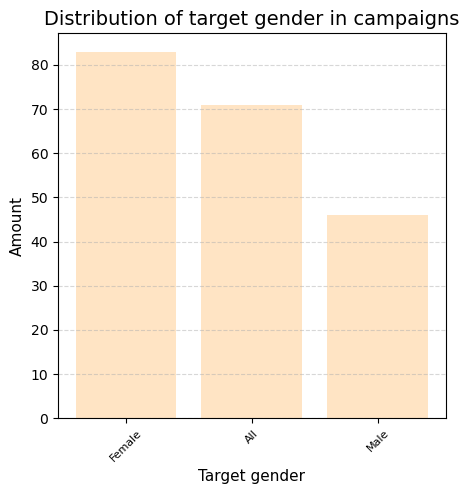

In [43]:
#Generating bar chart for target gender

#Counting occurences of users in age group
amt_tgt_gender = ads['target_gender'].value_counts()

#Plotting bar chart
plt.figure(figsize=(5,5))
plt.bar(amt_tgt_gender.index, amt_tgt_gender.values, color='bisque')
plt.title('Distribution of target gender in campaigns',fontsize=14)
plt.xlabel('Target gender',fontsize=11)
plt.ylabel('Amount',fontsize=11)
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Fig 5.** Summary on campaigns targetted gender <br>
Most campaigns were targetted at women

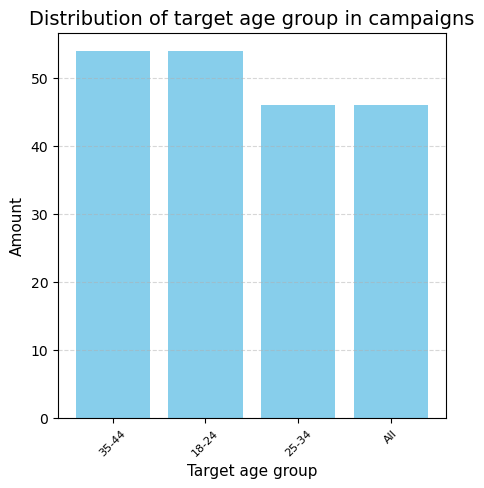

In [44]:
#Generating bar chart for target age group

#Counting occurences of users in age group
amt_tgt_age = ads['target_age_group'].value_counts()

#Plotting bar chart
plt.figure(figsize=(5,5))
plt.bar(amt_tgt_age.index, amt_tgt_age.values, color='skyblue')
plt.title('Distribution of target age group in campaigns',fontsize=14)
plt.xlabel('Target age group',fontsize=11)
plt.ylabel('Amount',fontsize=11)
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Fig 6.** Campaigns targetted age groups <br>
Most campaigns were targetted at the ages of 35-44 and 18-24

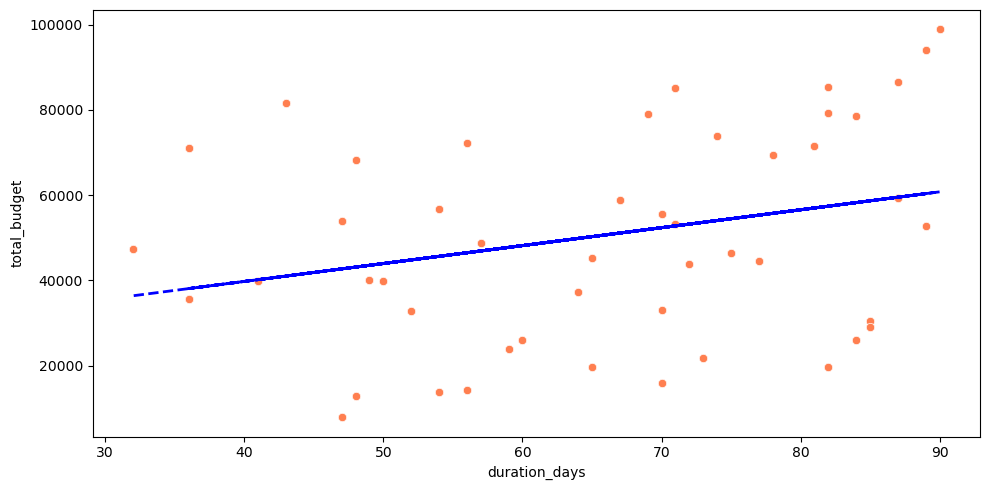

In [32]:
import numpy as np

#Correlation between campaign duration and budget

correlation = ad_events['duration_days'].corr(ad_events['total_budget'])

#Scatter plot to visualise relationship
plt.figure(figsize=(10,5))
sns.scatterplot(
    x=ad_events['duration_days'],
    y=ad_events['total_budget'],
    alpha=1,
    color='coral'
)

#Adding trend line
z = np.polyfit(campaigns['duration_days'], campaigns['total_budget'], 1)
p = np.poly1d(z)

#Plot the trend line
plt.plot(campaigns['duration_days'], p(campaigns['duration_days']), "b--", linewidth=2)

plt.tight_layout()
plt.show()

**Fig 7.** Correlation between campaign length and budget spent <br>
Weak positive correlation between length and budget; the longer the campaign the more budget is spent on the campaign

## **EDA**

### **Q1:**
#### Effectiveness of type of marketing campaign on customer segmentation
**Method of analysis:**
* Impression by gender per platform
* Impression by gender per ad type
* Impression by age group per platform
* Impression by age group per ad type

**Interactions comparisons between platform by gender**

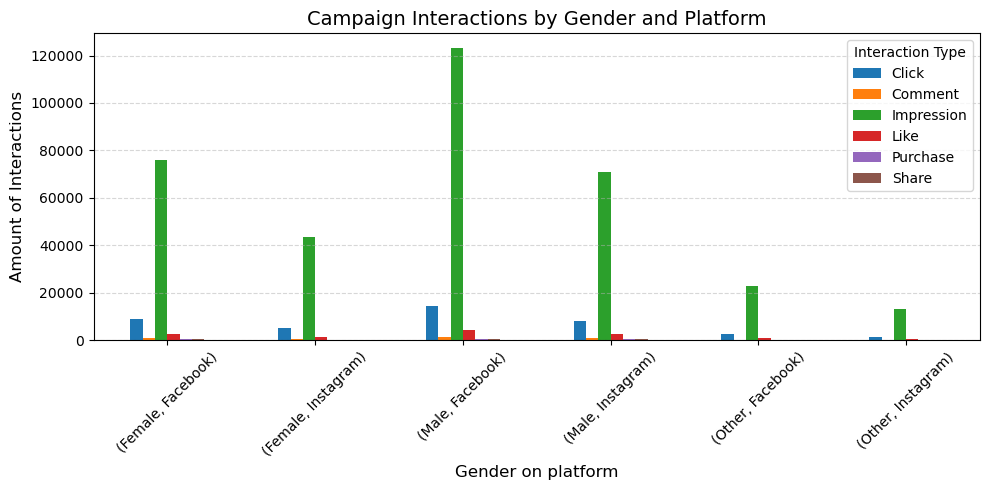

In [33]:
#group interactions by event type, gender, and ad platform
gender_platform_interactions = ad_events.groupby(['event_type', 'user_gender', 'ad_platform']).size().unstack(level='event_type')

#plot grouped bar chart
gender_platform_interactions.plot(kind='bar', figsize=(10,5))

#add details
plt.title('Campaign Interactions by Gender and Platform', fontsize=14)
plt.xlabel('Gender on platform', fontsize=12)
plt.ylabel('Amount of Interactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Interaction Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Interactions comparisons between ad type by gender**

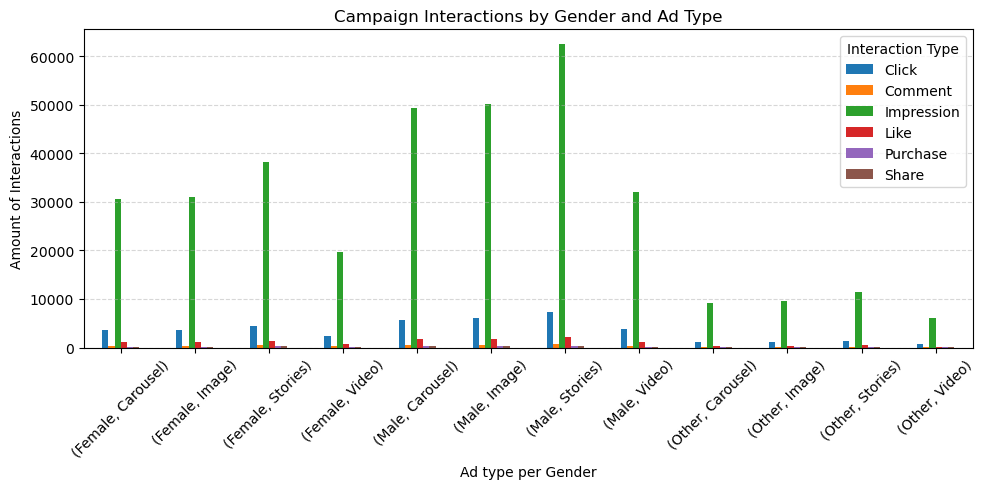

In [34]:
#Generate bar graph by event type, gender and ad type
gender_adtype_interactions = ad_events.groupby(['event_type','user_gender','ad_type']).size().unstack(level='event_type')

#Plot grouped bar chart
gender_adtype_interactions.plot(kind='bar',figsize=(10,5))

#Add details
plt.title('Campaign Interactions by Gender and Ad Type',fontsize=12)
plt.xlabel('Ad type per Gender', fontsize=10)
plt.ylabel('Amount of Interactions', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Interaction Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Interactions by age group**

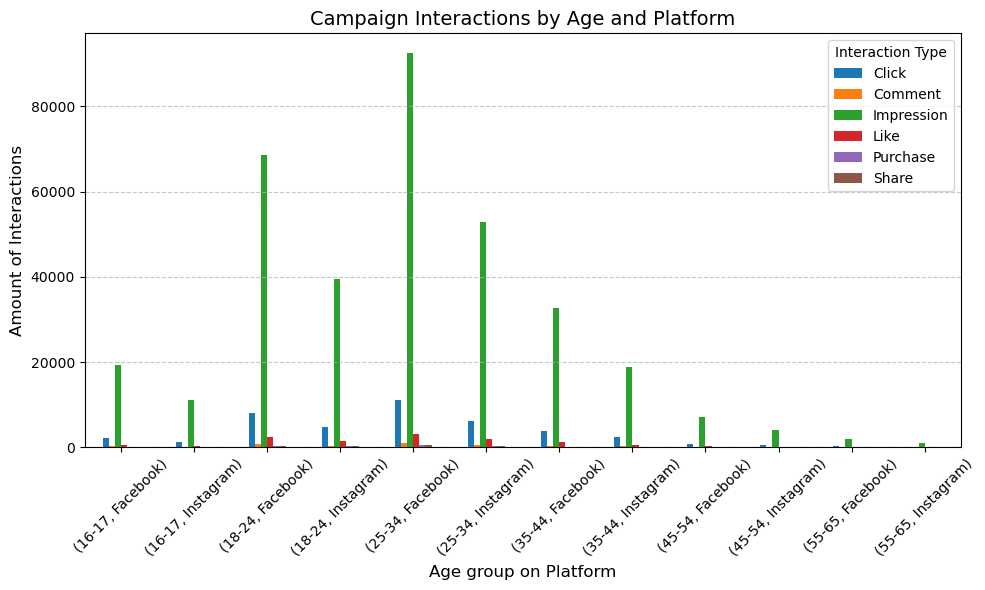

In [35]:
# Group interactions by event type, age group, and ad platform
agegrp_platform_interactions = ad_events.groupby(['event_type', 'age_group', 'ad_platform']).size().unstack(level='event_type')

# Plot grouped bar chart
agegrp_platform_interactions.plot(kind='bar', figsize=(10, 6))

# Add details
plt.title('Campaign Interactions by Age and Platform', fontsize=14)
plt.xlabel('Age group on Platform', fontsize=12)
plt.ylabel('Amount of Interactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Interaction Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

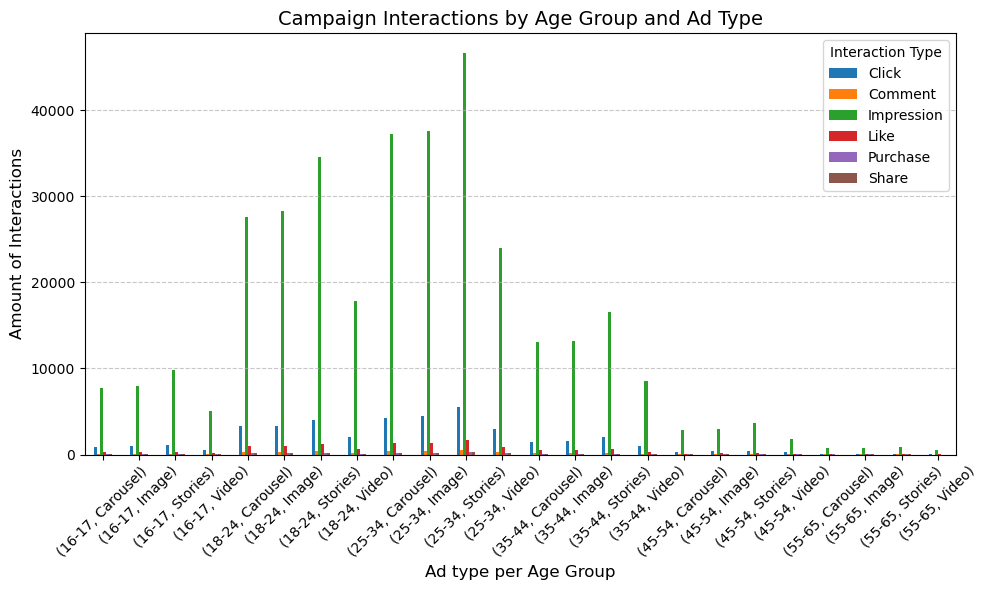

In [237]:
#Generate bar graph by event type, age group and ad type
agegrp_adtype_interactions = ad_events.groupby(['event_type','age_group','ad_type']).size().unstack(level='event_type')

#Plot grouped bar chart
agegrp_adtype_interactions.plot(kind='bar',figsize=(10,6))

#Add details
plt.title('Campaign Interactions by Age Group and Ad Type',fontsize=14)
plt.xlabel('Ad type per Age Group', fontsize=12)
plt.ylabel('Amount of Interactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Interaction Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **Q2:**
####  Determining cost-effectiveness of marketing channels per campaign
Methods of analysis:
* Budget and duration on interactions
* Comparing interactions between ad type and budget
* Comparing interactions between ad platform and budget

**Interactions comparisons between budget and campaign length**

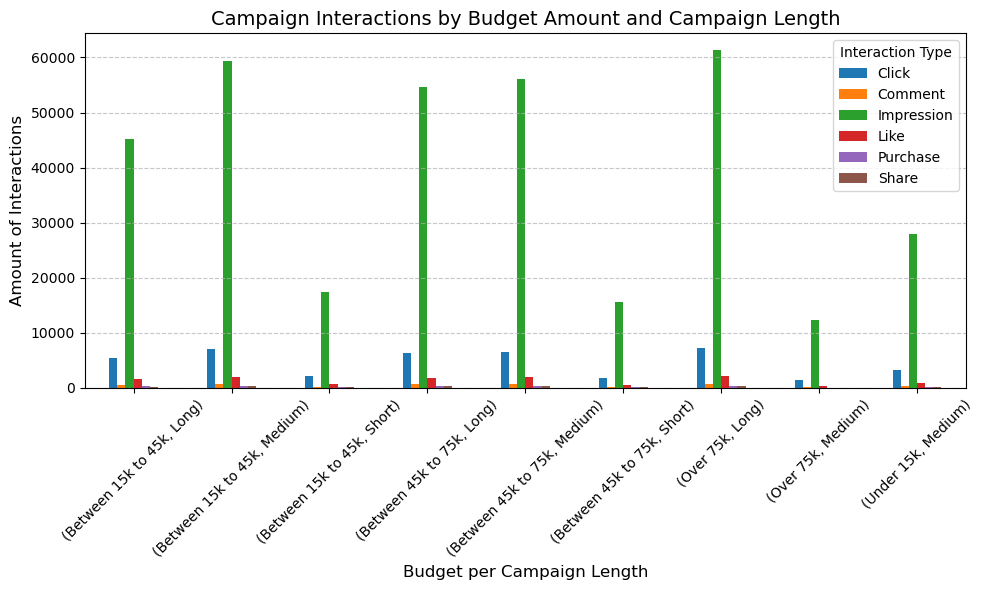

In [111]:
#Generate bar graph by event type, age group and ad type
budget_duration_interactions = ad_events.groupby(['event_type','budget_category','campaign_length']).size().unstack(level='event_type')

#Plot grouped bar chart
budget_duration_interactions.plot(kind='bar',figsize=(10,6))

#Add details
plt.title('Campaign Interactions by Budget Amount and Campaign Length',fontsize=14)
plt.xlabel('Budget per Campaign Length', fontsize=12)
plt.ylabel('Amount of Interactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Interaction Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Comparison between ad type interactions on budget**

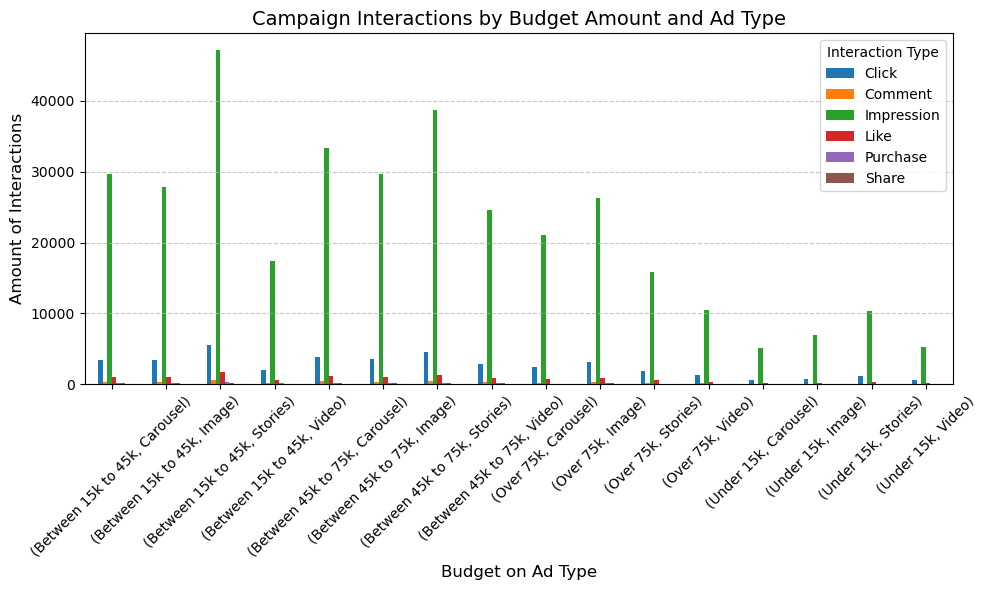

In [239]:
#Generate bar graph by event type, age group and ad type
budget_duration_interactions = ad_events.groupby(['event_type','budget_category','ad_type']).size().unstack(level='event_type')

#Plot grouped bar chart
budget_duration_interactions.plot(kind='bar',figsize=(10,6))

#Add details
plt.title('Campaign Interactions by Budget Amount and Ad Type',fontsize=14)
plt.xlabel('Budget on Ad Type', fontsize=12)
plt.ylabel('Amount of Interactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Interaction Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

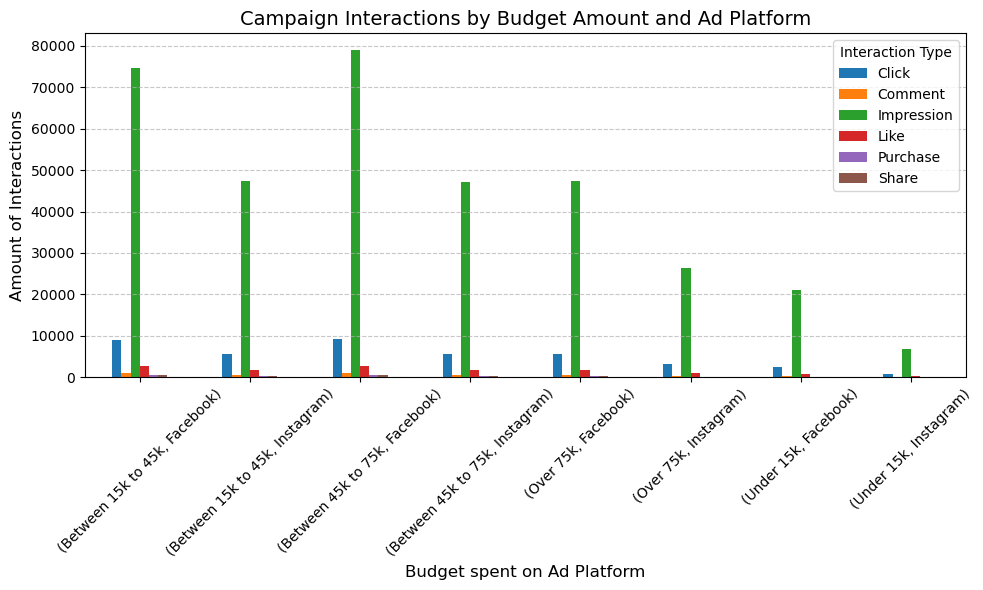

In [240]:
#Generate bar graph by event type, age group and ad type
budget_duration_interactions = ad_events.groupby(['event_type','budget_category','ad_platform']).size().unstack(level='event_type')

#Plot grouped bar chart
budget_duration_interactions.plot(kind='bar',figsize=(10,6))

#Add details
plt.title('Campaign Interactions by Budget Amount and Ad Platform',fontsize=14)
plt.xlabel('Budget spent on Ad Platform', fontsize=12)
plt.ylabel('Amount of Interactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Interaction Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Key Takeaways**

## **EDA Summary**

### **Question 1**
**Gender** <br>
Majority of impressions from campaigns generated by men. Distribution of ads targetted were mainly towards women and mixed-genders. As per analysis, this could be inferred as the success of mixed-genders targetted ads which possibly appealed more to men as compared to specific gender targetting.
<br>

**Age Groups** <br>
Bulk of impressions were between ages 25-34, which made up the majority of the userbase on both Facebook and Instagram. This meant that the platforms used outreach in the campaigns targetting this age group was extremely successful however outreach beyond has limited success. 

### Question 2
**Campaign effectiveness analysis**
Impressions were typically higher the longer campaigns were, and could be because the longer campaigns are the longer it can be pushed to people's feeds thereby increasing visbility. Facebook still remains the most cost-effective platform particularly with the understanding that it's better for adults in mid 20s to mid 30s. <br>

Impresisons however cannot be translated to meaningful engagement or even sales. 'Impressions' equates to amount of times a post is shown to a person, and comparing with actual engagement (likes, shares, purchases) there is a significant drop off. <br>

Stories had the greatest impressions, which could be due to the strategic placement of stories at the top of the app. Ads are more frequently seen inbetween stories of users' followings, which could have increased passive engagement with the campaigns. <br>

Digital marketing is a powerful tool for spreading the word and awareness of campaigns, with how quickly they can reach thousands of the targetted audience. 

## **Limitations and Areas of Improvement**

1. Limited analysis conducted on the campaign types and differences in impressions;
* Which of the campaigns (launch, seasonal campaigns) generated the most impressions <br>

While knowing which campaigns would generate the most impressions, there still remains little detail about what each campaign entails (what are the business launching, what occurs during the seasonal campaigns) and how these campaigns would ultimately lead to increase in revenue and profits for a company. <br>
To supplement Q1, comparing gender to targetted interests would also provide deeper insights into greater impressions and engagement with the userbase.

2. Limited in ads / platforms targetting both senior and younger populations


Facebook and Instagram have a large userbase between the ages of 25-34, as also indicated in the analysis. There was a distinct lack of ads targetted to the senior populations. 11% of Facebook's total audience are senior citizens, and is the platform's fastest-growing demographic ([ROAR, 2023](https://roardigitalmarketing.com/digital-marketing-blog/2023-social-media-demographics-facebook-makes-great-strides-with-older-population)) <br>
Additionally, using other social media could offer greater outreach to escaped demographics, such as running campaigns on Tiktok.